##Importing

In [6]:
import numpy as np
import pandas as pd
import os

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, TimeDistributed, Dense, Activation, Embedding
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Preprocessing

In [3]:
BATCH_SIZE = 16
SEQ_LENGTH = 64

In [4]:
f = open('/content/drive/MyDrive/Music_generation_project/input.txt','r')
text = f.read()

In [5]:
len(list(set(text)))

86

In [4]:
def create_dict(text):
  ch_idx = {}
  for i, ch in enumerate(sorted(list(set(text)))):
    ch_idx[ch] = i
  return ch_idx

ch_idx = create_dict(text)

# idx_ch = { i: ch for (ch, i) in ch_idx.items() }


NameError: ignored

In [18]:
idx_ch = { i: ch for (ch, i) in ch_idx.items() }

In [7]:
# converting text data into numerical

vocab_size = len(ch_idx)
train_text = np.asarray([ch_idx[ch] for ch in text], dtype=np.int32)

##Batch Generation

In [8]:
def name_batches(train_text):
  # length = train_text.shape[0]; #129,665
  batch_chars = int(train_text.shape[0] / BATCH_SIZE); # 8,104

  for start in range(0, batch_chars - SEQ_LENGTH, SEQ_LENGTH): # (0, 8040, 64)
      X = np.zeros((BATCH_SIZE, SEQ_LENGTH)) # 16X64
      Y = np.zeros((BATCH_SIZE, SEQ_LENGTH, vocab_size)) # 16X64X86
      for batch_idx in range(0, BATCH_SIZE): # (0,16)
          for i in range(0, SEQ_LENGTH): #(0,64)
              X[batch_idx, i] = train_text[batch_chars * batch_idx + start + i] # 
              Y[batch_idx, i, train_text[batch_chars * batch_idx + start + i + 1]] = 1
      yield X, Y


In [13]:
# model.save('/content/drive/MyDrive/Music_generation_project')

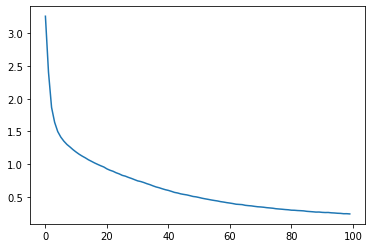

In [17]:
import matplotlib.pyplot as plt

plt.plot(loss_rec)
plt.show()

##Training

In [1]:

def build_model(batch_size, seq_len, vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 512, batch_input_shape=(batch_size, seq_len)))
    
    model.add(LSTM(256, return_sequences=True, stateful=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=True, stateful=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=True, stateful=True))
    model.add(Dropout(0.2))

    model.add(TimeDistributed(Dense(vocab_size))) 
    model.add(Activation('softmax'))
    return model

In [8]:
#model_architecture
model = build_model(BATCH_SIZE, SEQ_LENGTH, vocab_size)
# model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (16, 64, 512)             44032     
                                                                 
 lstm_3 (LSTM)               (16, 64, 256)             787456    
                                                                 
 dropout_3 (Dropout)         (16, 64, 256)             0         
                                                                 
 lstm_4 (LSTM)               (16, 64, 256)             525312    
                                                                 
 dropout_4 (Dropout)         (16, 64, 256)             0         
                                                                 
 lstm_5 (LSTM)               (16, 64, 256)             525312    
                                                                 
 dropout_5 (Dropout)         (16, 64, 256)            

In [ ]:

# Training

def train(train_text,epochs,save_after):
  loss_rec, acc_rec = [] , []
  for e in range(epochs):
    # print(f"{e} /{epochs}")
    losses, accuracies = [] , []
    for i, (X,Y) in enumerate(name_batches(train_text)):
      # print(X.shape)
      loss,acc = model.train_on_batch(X,Y)
      # print(f"Batch {i+1} of epoch {e}/{epochs} has Loss = {loss} and accuracy = {acc}")
      losses.append(loss)
      accuracies.append(acc)
    if e%save_after == 0:
      model.save_weights(f'/content/drive/MyDrive/Music_generation_project/weights{e+1}.h5')
      print(f'weights{e+1}.h5 saved')
    print(f"Epoch {e}/{epochs} has loss = {np.average(losses)} and accuracy = {np.average(accuracies)}")
    loss_rec.append(np.average(losses))
    acc_rec.append(np.average(accuracies))
  return loss_rec,acc_rec


In [ ]:
loss_rec,acc_rec = train(train_text,100,10)

##Output

In [29]:
def build_output_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 512, batch_input_shape=(1, 1)))
    
    model.add(LSTM(256, return_sequences=True, stateful=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=True, stateful=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=False, stateful=True))
    model.add(Dropout(0.2))

    model.add(Dense(vocab_size))
    model.add(Activation('softmax'))
    return model

In [30]:
def GenerateOutput(initial, seq_len):
    
    model = build_output_model()
    model.load_weights('/content/drive/MyDrive/Music_generation_project/weights91.h5')
    

    seed = [ch_idx[c] for c in initial]
    print(seed)
    

    for i in range(seq_len):
        batch = np.zeros((1, 1))
        if seed:
            batch[0, 0] = seed[-1]
        else:
            batch[0, 0] = np.random.randint(vocab_size)
        result = model.predict_on_batch(batch).ravel()
        prediction = np.random.choice(range(vocab_size), p=result)
        seed.append(prediction)

    return ''.join(idx_ch[c] for c in seed)


In [31]:
print(GenerateOutput('',500))

[]
F"FEF|"Em"E3 -E2G||


X: 108
T:The Giant's Silver
% Nottingham Music Database
Y:AABBCC
S:John Kirkpatrinas, via EF
M:6/8
K:D
P:A
|:f|"D"d2F FGF|"A7"ABc "D"def|"G"ede "D"fed|"Em"cdB "A7"A2:|
P:B
A|"D"dfa afd|"D7"def "G"gfg|"D7"fed dcd|"C"ecc e2d|
"D"AFA "G"BAG|"A7"FGA ABc|"D"dcd "Em"e2f|"A7"edc "D"d2:|
P:C
|:c/2d/2|"C"e2e cde|"G"d2g d2d|"Am"cdc "Em"B2B|"Am"Ace "D7"edc|"G"B3 -B2:|


X: 65
T:Danny MacPhails
% Nottingham Music Database
S:Trad, arr Phil Rowe
M:6/8
K:D
A|"D"dfe d2A|"D"d2f f2a|"D"fed "
